In [354]:
import pandas as pd
import numpy as np
import random
import seaborn as sns; sns.set()

from ipywidgets import widgets
from IPython.display import display

%matplotlib inline  

In [187]:
data =  pd.read_csv("PMdata.csv")

data["pm"] = data["pm"].replace("<", "0")
data["pm"] = data["pm"].replace(" ", "0")
# data = data[data.pm.notnull()]
data["pm"] = data["pm"].astype(float)

data["datetime"] = pd.to_datetime(data.datetime, format='%m/%d/%y %H:%M')

data.set_index('datetime', inplace=True)

data = data.ix["2014"]
data = data[~pd.isnull(data).any(axis=1)]

pm = data.pm.tolist()

In [38]:
data.reset_index(inplace=True)

In [98]:
pm = data.pm.tolist()

In [80]:
pm[8759]

5.4

In [70]:
random.randint(0,len(pm))

2576

In [75]:
pm.pop(2576)

3.2

In [189]:
np.mean(pm)

6.2765828571428566

In [305]:
len(pm)

8750

In [317]:
[x+1 for x in range(15)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [302]:
def rand(data, lengths, visits):
    mean = np.mean(data)
    results = []
    for v in visits:
        length_results = []
        for l in lengths:
            d = data.copy()
            vloop = v
            s = []
            while vloop > 0:
                r = random.randint(0,len(d)-1)
                while len(d) < r + l:
                    r = random.randint(0,len(d)-1)
                for i in range(l):
                    s.append(d.pop(r))
                vloop -= l
            length_results.append(abs(np.mean(s) - mean))
        results.append(length_results)
    return results
    

In [429]:
randTest = rand(pm, [x+1 for x in range(15)], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 500])
# randTest, s = rand(pm, [1], [1000])
# df = pd.DataFrame(s)
# df.hist()

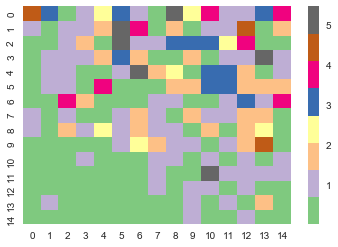

In [430]:
# sns.color_palette("Paired", as_cmap=True)
# cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
# sns.choose_diverging_palette()
# cmap = sns.color_palette(240, 10, n=9, cmap=True)
ax = sns.heatmap(randTest, cmap="Accent")

In [48]:
data.drop([0])

,datetime,pm
1,2014-01-01 01:00:00,29.0
2,2014-01-01 02:00:00,21.8
3,2014-01-01 03:00:00,13.3
4,2014-01-01 04:00:00,15.2
5,2014-01-01 05:00:00,12.9
6,2014-01-01 06:00:00,8.2
7,2014-01-01 07:00:00,7.9
8,2014-01-01 08:00:00,8.5
9,2014-01-01 09:00:00,8.9
10,2014-01-01 10:00:00,7.7


In [161]:
annualAvg = np.mean(data.pm)

In [162]:
annualAvg

6.276582857142844

In [9]:
len(data.pm)

8760

In [245]:
sampleAvg = np.mean(data.take(np.random.permutation(len(data))[:1000]).pm)

In [246]:
sampleAvg

6.113299999999991

In [15]:
sampleAvg = np.mean(data.take(np.random.permutation(len(data))[:5]).pm)
sampleAvgs = []
for i in range(1000):
    sampleAvgs.append(np.mean(data.take(np.random.permutation(len(data))[:5]).pm))

In [13]:
data.take(np.random.permutation(len(data))[:5]).pm

datetime
2014-10-27 09:00:00    10.5
2014-01-25 17:00:00     5.2
2014-12-19 13:00:00     1.7
2014-07-24 12:00:00     3.3
2014-03-27 07:00:00     1.5
Name: pm, dtype: float64

In [14]:
data.sample(n=5).pm

datetime
2014-01-01 06:00:00     8.2
2014-02-08 04:00:00     3.2
2014-07-29 08:00:00     4.2
2014-08-23 08:00:00    10.9
2014-04-18 16:00:00     3.1
Name: pm, dtype: float64

In [16]:
sampleAvgs2 = []
for i in range(1000):
    sampleAvgs2.append(np.mean(data.sample(n=5).pm))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10db51470>]], dtype=object)

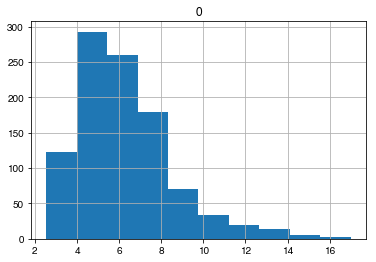

In [17]:
df2 = pd.DataFrame(sampleAvgs2)
df2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d2e6128>]], dtype=object)

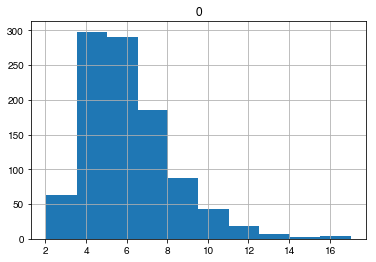

In [18]:
df = pd.DataFrame(sampleAvgs)
df.hist()

In [3]:
uniform_data = np.random.rand(10, 12)

In [4]:
uniform_data

array([[ 0.97802044,  0.50138008,  0.12037897,  0.02188043,  0.85461811,
         0.8217014 ,  0.13127829,  0.16098051,  0.38067068,  0.69237515,
         0.81130553,  0.73751703],
       [ 0.82066353,  0.1616369 ,  0.0882263 ,  0.52551445,  0.76683675,
         0.78055372,  0.3109151 ,  0.90991658,  0.74870347,  0.70478773,
         0.00833904,  0.23969491],
       [ 0.92101222,  0.12298682,  0.41809457,  0.78242087,  0.77436766,
         0.46443669,  0.16543257,  0.3019539 ,  0.49202781,  0.03155179,
         0.18614536,  0.90085184],
       [ 0.50421279,  0.78808387,  0.30945059,  0.66593542,  0.26140491,
         0.64641729,  0.93061068,  0.18703038,  0.77889126,  0.38466413,
         0.53435187,  0.39894999],
       [ 0.53275317,  0.52586636,  0.72418005,  0.02611774,  0.55613439,
         0.47662244,  0.33559134,  0.0167529 ,  0.26449919,  0.44152902,
         0.93267666,  0.70699767],
       [ 0.90854977,  0.26089401,  0.74878386,  0.72763483,  0.66120846,
         0.30294625,  